In [1]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams.update({'figure.autolayout': True})
font = {'size': 12}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import csv
import pandas as pd

In [3]:
def same_result(row):
    res = False
    if row['norm_score'] < 0 and row['norm_liwc'] < 0:
        res = True
    if row['norm_score'] > 0 and row['norm_liwc'] > 0:
        res = True
    if row['norm_score'] == 0 and row['norm_liwc'] == 0:
        res = True
    return res

###b) 2)

In [50]:
df_b2 = pd.read_csv('control_results_minmax_minmax.csv')

In [60]:
df_b2.head()

,#s,sentence,score,liwc,norm_score,norm_liwc,same
4,5,'I love how this blurs the lines between indoo...,1.000000,9.09,0.500000,0.381772,True
8,9,A Lorain man was arrested after hitting his br...,-1.000000,3.45,-0.500000,0.144897,False
10,11,A Moscow district court on Thursday arrested a...,-0.333333,-9.09,-0.166667,-0.381772,True
12,13,A Web site run by a Texas law student has remo...,1.000000,-2.50,0.500000,-0.104998,False
13,14,A colorful gem added to a simple white shirt a...,1.000000,4.17,0.500000,0.175136,True


In [61]:
df_b2 = df_b2[df_b2.norm_liwc!=0]
df_b2 = df_b2[df_b2.norm_score!=0]

In [62]:
df_b2[df_b2.norm_score==0].count()

#s            0
sentence      0
score         0
liwc          0
norm_score    0
norm_liwc     0
same          0
dtype: int64

In [63]:
df_b2[df_b2.norm_liwc==0].count()

#s            0
sentence      0
score         0
liwc          0
norm_score    0
norm_liwc     0
same          0
dtype: int64

In [64]:
df_b2['same'] = df_b2.apply(same_result, axis=1)
total = df_b2.same.count()
equals = df_b2[df_b2.same == True].count()['same']
different = df_b2[df_b2.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 86
Equals: 60
Different: 26
Accuracy: 69.7674418605


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b92cf9690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6b92b59b10>]], dtype=object)

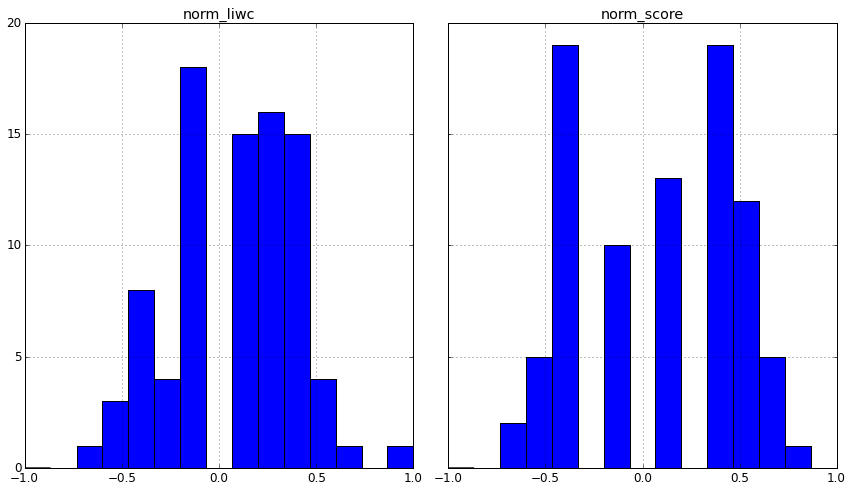

In [65]:
df_b2[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

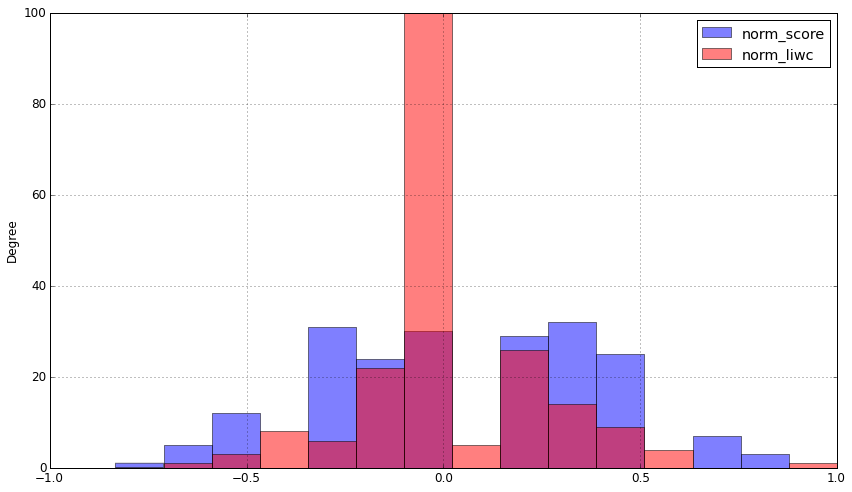

In [29]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

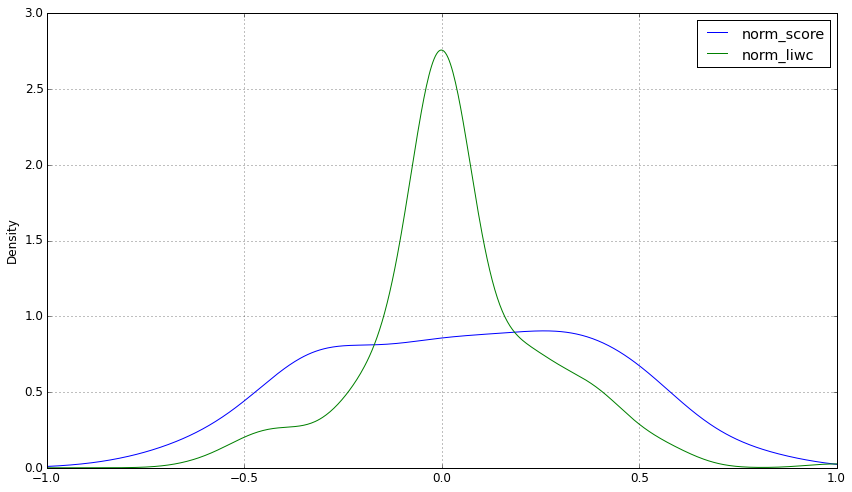

In [30]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])